In [2]:
import pandas as pd
df=pd.read_csv("C:\\Users\\conta\\Downloads\\archive (7)\\online_retail_II.csv")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [8]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

###handling missing values
first,we identify the missing values across the dataset the initial check reveals significant missing data in the 'Description' and 'customer_id' columns

In [9]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [10]:
df=df.rename(columns={'StockCode':'stock_code',
                      'InvoiceDate':'invoice_date',
                      'Customer ID':'customer_id'})
df

,Invoice,stock_code,Description,Quantity,invoice_date,Price,customer_id,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Invoice       1067371 non-null  object 
 1   stock_code    1067371 non-null  object 
 2   Description   1062989 non-null  object 
 3   Quantity      1067371 non-null  int64  
 4   invoice_date  1067371 non-null  object 
 5   Price         1067371 non-null  float64
 6   customer_id   824364 non-null   float64
 7   Country       1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


##temporal data processing
the 'invoice_date' column was initially loaded as an object type:to enabletime-series analysis (such as calculating monthly sales or customer retention),we must convert this to **datetime**object
**steps taken**
converted 'invoice_date' using 'pd.to_datetime()'
verified the change using 'df.info()' to ensure Dtype is now 'datetime'

In [12]:
df['invoice_date']=pd.to_datetime(df['invoice_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Invoice       1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   Description   1062989 non-null  object        
 3   Quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   Price         1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   Country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


##data cleaning step:
we will remove any rows where these critical identifiers are missing to maintain data integrity

In [14]:
df=df.dropna(subset=['Description','customer_id'])
df.isna().sum()

Invoice         0
stock_code      0
Description     0
Quantity        0
invoice_date    0
Price           0
customer_id     0
Country         0
dtype: int64

##temporal data processing
the 'customer_id' column was initially loaded as an float 
**steps taken**
converted 'customer_id' using 'astype()'
verified the change using 'df.info()' to ensure Dtype is now 'datetime'

In [ ]:
df['customer_id']=df['customer_id'].astype(int)
df.info()
df

C:\Users\conta\AppData\Local\Temp\ipykernel_20200\2137423106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_id']=df['customer_id'].astype(int)


<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       824364 non-null  object        
 1   stock_code    824364 non-null  object        
 2   Description   824364 non-null  object        
 3   Quantity      824364 non-null  int64         
 4   invoice_date  824364 non-null  datetime64[ns]
 5   Price         824364 non-null  float64       
 6   customer_id   824364 non-null  int64         
 7   Country       824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 56.6+ MB


,Invoice,stock_code,Description,Quantity,invoice_date,Price,customer_id,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


##calculating total price
we need to create a total column by multiplying the unit price by the quantity ordered for each row

In [17]:
df.loc[:,'Total']=df['Quantity']*df['Price']
df

,Invoice,stock_code,Description,Quantity,invoice_date,Price,customer_id,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


##identifying cancelled transactions
in this dataset,cancelled orders are prefixed with the letter **C** in the 'Invoice' column we need to isolate these transaction to analyze  return patterns and ensure they don't skew our total sales
**action **
filter the dataframe for all 'Invoice' strings startswith 'C'
store these in separate variable called 'cancellations'

In [18]:
cancellations=df[df['Invoice'].str.startswith('C',na=False)]
cancellations

,Invoice,stock_code,Description,Quantity,invoice_date,Price,customer_id,Country,Total
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


to ensure our sales analysis reflects actual revenue rather than grodd orders,we must remove the cancellations identified in the previous step
using the '~'(NOT) operator,we filter the dataframe to retain only those records where the 'Invoice' does not start with 'C'

In [12]:
df=df[~df['Invoice'].str.startswith('C',na=False)]
df

,Invoice,stock_code,Description,Quantity,invoice_date,Price,customer_id,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [13]:
cancellations=df[df['Invoice'].str.startswith('C',na=False)]
cancellations

,Invoice,stock_code,Description,Quantity,invoice_date,Price,customer_id,Country,Total


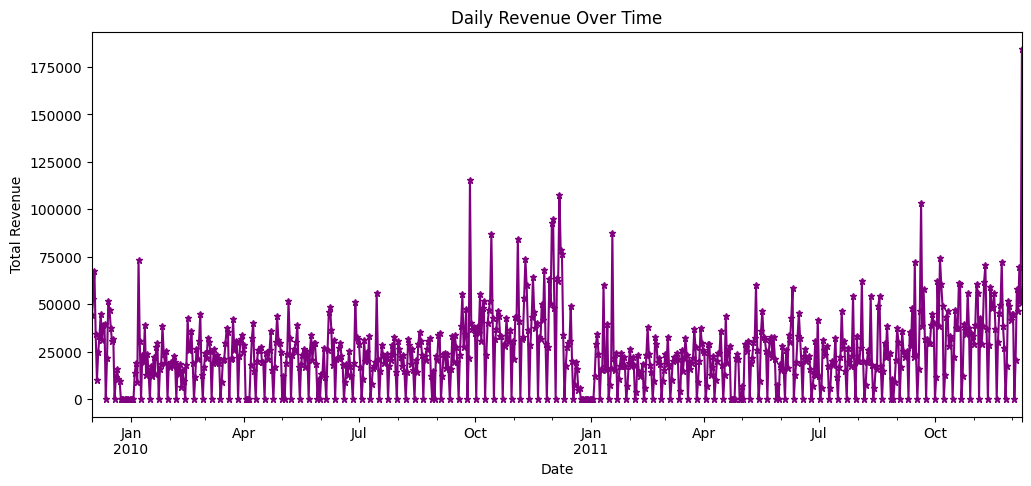

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_time=df.set_index('invoice_date')
daily_revenue=df_time['Total'].resample('D').sum()
daily_revenue
plt.figure(figsize=(12,5))
daily_revenue.plot(kind='line',color='purple',marker='*',markersize=5)
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()

#Insights from daily revenue over time
Daily revenue shows an upward trend with significant fluctuations and periodic spikes indicating business growth driven by irregular high value transactions and seasonal demand


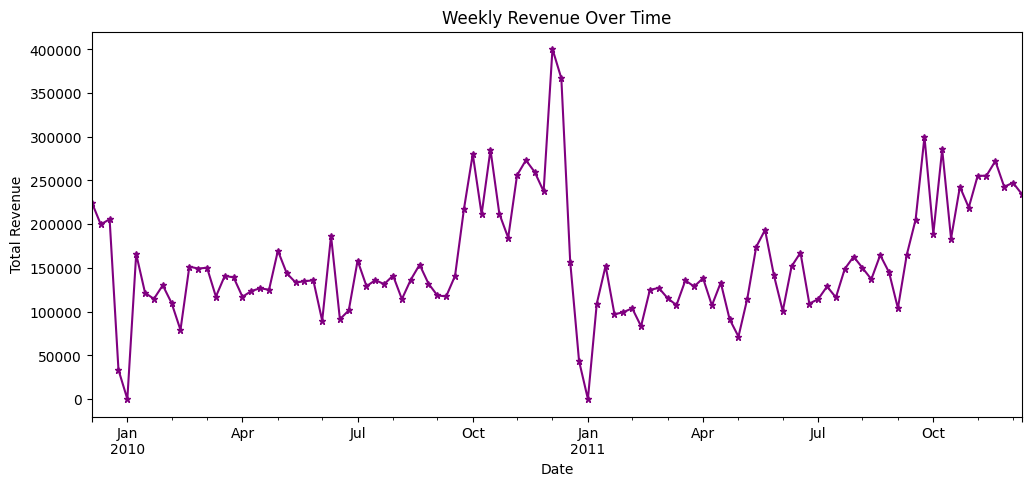

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
#df_time=df.set_index('invoice_date')
weekly_revenue=df.resample('W',on='invoice_date')['Total'].sum()
plt.figure(figsize=(12,5))
weekly_revenue.plot(kind='line',color='purple',marker='*',markersize=5)
plt.title("Weekly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()

##insights for weekly revenue over time
**weekly revenue fluctuates over time with clear year-endpeaks,indicating seasonal demand and an overall upward business trend

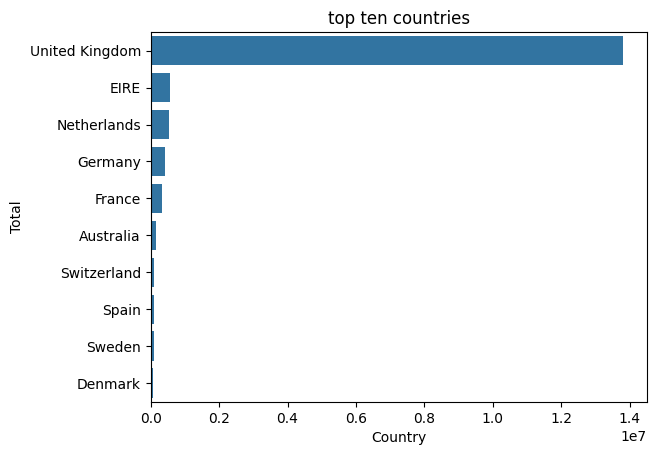

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
top_countries=df.groupby('Country')['Total'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='Total',y='Country',data=top_countries)
plt.title("top ten countries")
plt.xlabel("Country")
plt.ylabel("Total")
plt.show()

##Insights fot top ten countries by total sales
**the united kingdom is the primary revenue driver,contributing a disproportionality large share of total sales compared to other countries
**sales from other countries remain relatively low,indicating that international markets are underutilized

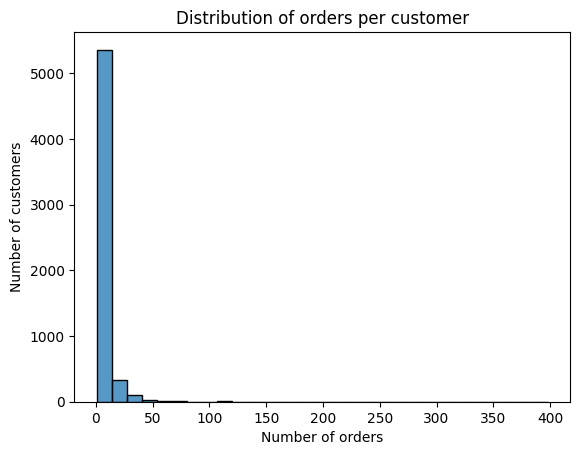

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
orders=df.groupby('customer_id')['Invoice'].nunique().reset_index(name='orders_count')
sns.histplot(orders['orders_count'],bins=30)
plt.title('Distribution of orders per customer')
plt.xlabel('Number of orders')
plt.ylabel('Number of customers')
plt.show()

##Orders per customer
**most customers place only a single order,indicating low retention and a strong opportunity to increase repeat purchases

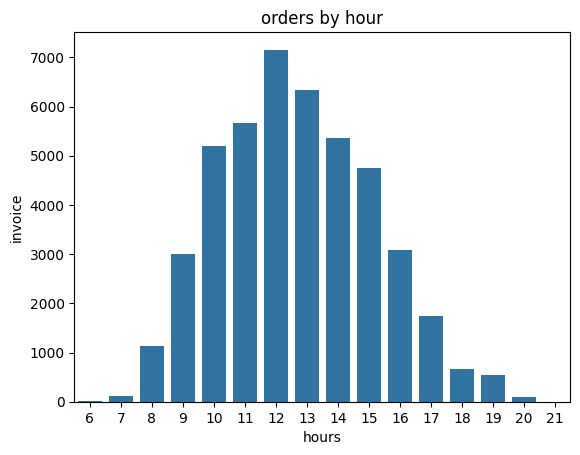

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df['Hour']=df['invoice_date'].dt.hour
orders=(
        df.groupby('Hour')['Invoice']
        .nunique()
        .reset_index()
)
sns.barplot(x='Hour',y='Invoice',data=orders)
plt.title("orders by hour")
plt.xlabel('hours')
plt.ylabel('invoice')
plt.show()

##Insights for order by houur 
**Order value increases significantly from morning hours and peaks around 12PM,indicating the highest customer activity during late morning to ealy afternoon
**order activity is minimal during early morning and lae evening hours suggesting limited customer engagement outside standard working hours

In [ ]:
###Orders by dayofweek 

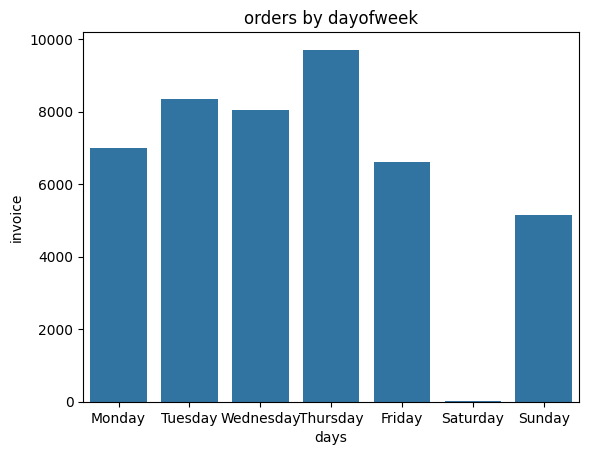

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df['dayofweek']=df['invoice_date'].dt.day_name()
orders=(
        df.groupby('dayofweek')['Invoice']
        .nunique()
        .reset_index()
)
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
orders['dayofweek']=pd.Categorical(orders['dayofweek'],categories=days_order,ordered=True)
orders=orders.sort_values('dayofweek')
sns.barplot(x='dayofweek',y='Invoice',data=orders)
plt.title("orders by dayofweek")
plt.xlabel('days')
plt.ylabel('invoice')
plt.show()

##insights from order by dayof week
**Order volume is highest on weekends--especially thursday-and drops significantly on weekends,indicating stringer weekday-driven customer activity

Cohort analysis was used to evaluate customer retention behaviour over time and identify oppoertunities to improve customer lifetime value

<Axes: xlabel='cohort_index', ylabel='cohort_month'>

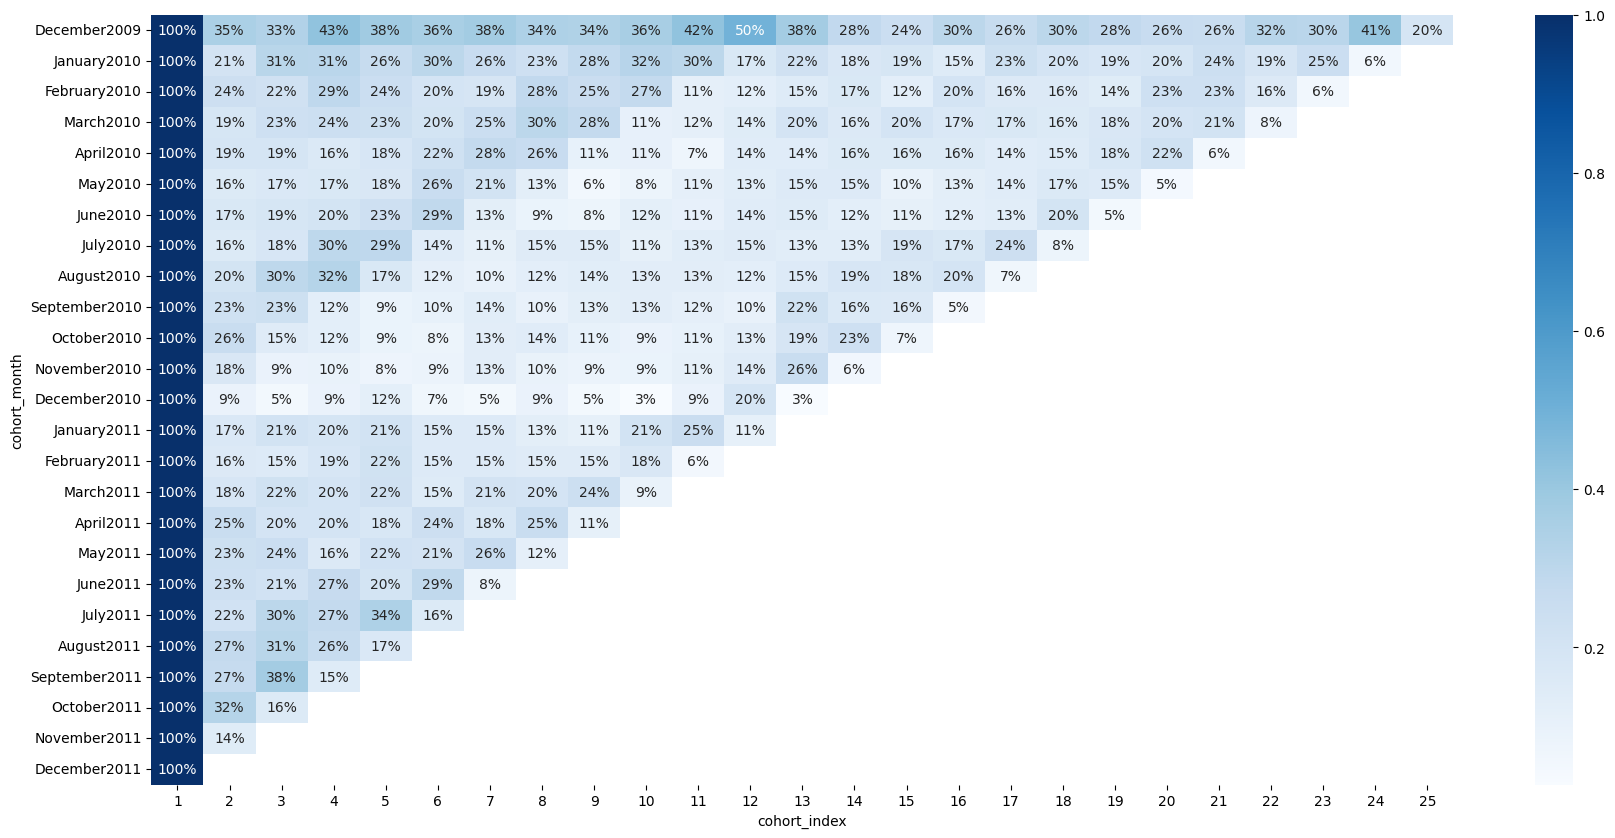

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# function for month
def get_month(x):
    return dt.datetime(x.year,x.month,1)
#apply the function
df.loc[:,'invoice_month']=df['invoice_date'].apply(get_month)
# create a column index with the minimum invoice date aka first time customer was acquired
df['cohort_month']=df.groupby('customer_id')['invoice_month'].transform('min')
#create a date element to get a series of subscription
def get_date_element(data,column):
    day=data[column].dt.day
    month=data[column].dt.month
    year=data[column].dt.year
    return day,month,year
Invoiceday,Invoicemonth,Invoiceyear=get_date_element(df,'invoice_month')
cohortday,cohortmonth,cohotyear=get_date_element(df,'cohort_month')
#create a cohort index
year_diff=Invoiceyear-cohotyear
month_diff=Invoicemonth-cohortmonth
df['cohort_index']=year_diff*12+month_diff+1
cohort_data=df.groupby(['cohort_month','cohort_index'])['customer_id'].nunique().reset_index()
cohort_data
#create a pivot table
cohort_table=cohort_data.pivot(index='cohort_month',columns=['cohort_index'],values='customer_id')
#visualize our results in heatmap
#change index
cohort_table.index=cohort_table.index.strftime('%B''%Y')
cohort_size=cohort_table.iloc[:,0]
retention=cohort_table.divide(cohort_size,axis=0)
plt.figure(figsize=(21,10))
sns.heatmap(retention,annot=True,fmt='.0%',cmap='Blues')
plt.show()

#Cohort retention insights
**Customer retention drops significantly after the first month,indicating high early-stage churn
**customer who remain active beyond the third month exhibit relatively stable retention,suggesting the presence of loyal customer segment

In [25]:
df.to_csv("cleaned_online_retail_analysis_data.csv",index=False)